In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

from asa.plot_methods import plot_contour
from asa.control import control_1d

## Generate two samples

In [3]:
X_A = np.concatenate([
    multivariate_normal(mean=[0, 1], cov=0.15).rvs(10000),
    multivariate_normal(mean=[1, 0], cov=0.15).rvs(1000)
])

X_B = np.concatenate([
    multivariate_normal(mean=[0, 0], cov=0.15).rvs(1000),
    multivariate_normal(mean=[1, 1], cov=0.15).rvs(10000)
])

Text(0, 0.5, 'Y')

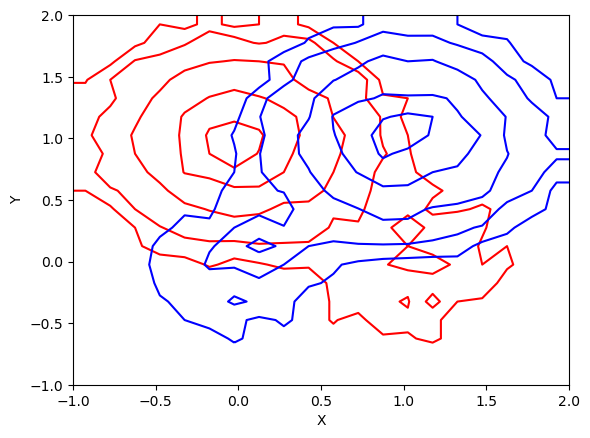

In [10]:
plot_contour(X_A[:, 0],
             X_A[:, 1],
             color='red',
             plot_datapoints=False,
             plot_density=False,
             range=((-1, 2), (-1, 2)))
plot_contour(X_B[:, 0],
             X_B[:, 1],
             color='blue',
             plot_datapoints=False,
             plot_density=False,
             range=((-1, 2), (-1, 2)))
plt.xlabel('X')
plt.ylabel('Y')

Text(0.5, 0, 'X')

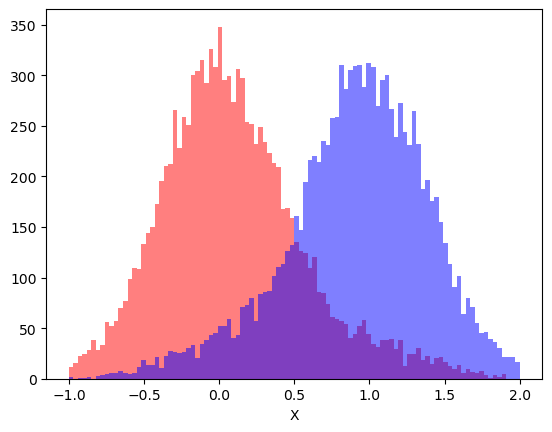

In [8]:
plt.hist(X_A[:, 0], bins=100, color='red', alpha=0.5, range=(-1, 2))
plt.hist(X_B[:, 0], bins=100, color='blue', alpha=0.5, range=(-1, 2))
plt.xlabel('X')

Text(0.5, 0, 'Y')

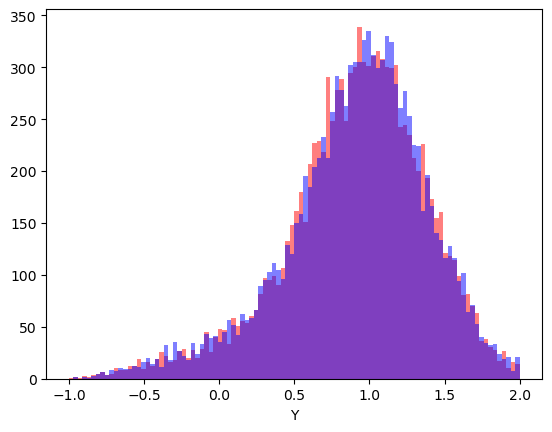

In [9]:
plt.hist(X_A[:, 1], bins=100, color='red', alpha=0.5, range=(-1, 2))
plt.hist(X_B[:, 1], bins=100, color='blue', alpha=0.5, range=(-1, 2))
plt.xlabel('Y')

## Control to which sample?

Text(0.5, 1.0, 'Control to sample A')

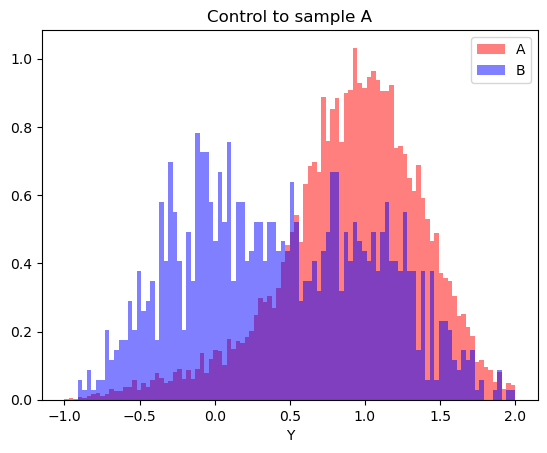

In [ ]:
# we find sample A have higher Y than sample B, if we control X distribution to sample A
A_index, B_index, _, _ = control_1d(X_A[:, 0],
                                    X_B[:, 0],
                                    bins=10,
                                    auto_method='x_A',
                                    _range=(-1, 2),
                                    P_atol=0.01,
                                    P_rtol=0.01)

plt.hist(X_A[:, 1][A_index],
         bins=100,
         color='red',
         alpha=0.5,
         range=(-1, 2),
         density=True,
         label='A')
plt.hist(X_B[:, 1][B_index],
         bins=100,
         color='blue',
         alpha=0.5,
         range=(-1, 2),
         density=True,
         label='B')
plt.legend()
plt.xlabel('Y')
plt.title('Control to sample A')

Text(0.5, 1.0, 'Control to sample B')

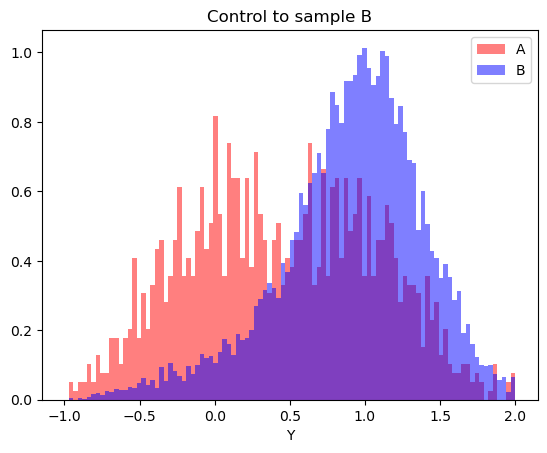

In [ ]:
# we find sample B have higher Y than sample A, if we control X distribution to sample B
A_index, B_index, _, _ = control_1d(X_A[:, 0],
                                    X_B[:, 0],
                                    bins=10,
                                    auto_method='x_B',
                                    _range=(-1, 2),
                                    P_atol=0.01,
                                    P_rtol=0.01)

plt.hist(X_A[:, 1][A_index],
         bins=100,
         color='red',
         alpha=0.5,
         range=(-1, 2),
         density=True,
         label='A')
plt.hist(X_B[:, 1][B_index],
         bins=100,
         color='blue',
         alpha=0.5,
         range=(-1, 2),
         density=True,
         label='B')
plt.legend()
plt.xlabel('Y')
plt.title('Control to sample B')